BP神经网络

根据BP神经网络原理，实现简单的BP神经网络(64, 100, 10)，并绘制网络结构简图和标注


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import LabelBinarizer# 标签二值化
from sklearn.model_selection import train_test_split # 切割数据

In [2]:
digits = load_digits()# 载入数据
X = digits.data# 数据
y = digits.target# 标签

# 数据归一化
X -= X.min()
X /= X.max()

In [3]:
def sigmoid(x):                                                                   
    ret = np.zeros((len(x)))                                                      
    for i in range(len(x)):                                                       
        if x[i] >= 0:                                                             
            ret[i] = 1.0 / (1 + np.exp(-x[i]))                                    
        else:                                                                     
            ret[i] = np.exp(x[i]) / (1 + np.exp(x[i]))                            
    return ret                                                                    
                                                                                  
def dsigmoid(x):                                                                  
    #print(x)                                                                     
    return x * (1 - x)                                                            

In [11]:
class NeuralNetwork:                                                                                                                                                                                                
    # 初始化网络                                                                                                                                                                                                         
    def __init__(self, layers):  # (64,100,10)                                                                                                                                                                      
        self.layers_num = len(layers)   #神经网络层数                                                                                                                                                                     
        self.layers = layers                                                                                                                                                                                        
        #除去输入层，其余层需要随机产生n个神经元的bias值，在（0，1）之间                                                                                                                                                                        
        self.biases = [np.random.randn(y, 1) for y in layers[1: ]]  #randn的参数表示产生随机数数量的各维度大小，layers[1:]其中的1是因为从第二层开始才需要bias                                                                                         
        #随机产生每条神经元连接线的权重值，在（0，1）之间                                                                                                                                                                                  
        #zip() 函数用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的列表。                                                                                                                                                    
        #如果各个迭代器的元素个数不一致，则返回列表长度与最短的对象相同，利用 * 号操作符，可以将元组解压为列表                                                                                                                                                       
        #如a = [1,2,3] b = [4,5,6] zipped = zip(a,b) ： [(1, 4), (2, 5), (3, 6)]                                                                                                                                      
        self.weights = [np.random.randn(y, x) for x, y in zip(layers[: -1], layers[1: ])]                                                                                                                           
                                                                                                                                                                                                                    
    def cost_derivative(self, output_activations, y):                                                                                                                                                               
        return (output_activations - y)                                                                                                                                                                             
                                                                                                                                                                                                                    
    def backprop(self, x, y):                                                                                                                                                                                       
        nabla_b = [np.zeros(b.shape) for b in self.biases]                                                                                                                                                          
        nabla_w = [np.zeros(w.shape) for w in self.weights]                                                                                                                                                         
        # 前向传输                                                                                                                                                                                                      
        #每个数据是一个长64的array数组                                                                                                                                                                                         
        activation = x                                                                                                                                                                                              
        # 储存每层的神经元的值的矩阵，下面循环会 append 每层的神经元的值                                                                                                                                                                       
        activations = [x]                                                                                                                                                                                           
        # 储存每个未经过 sigmoid 计算的神经元的值                                                                                                                                                                                  
        zs = []                                                                                                                                                                                                     
        #print(self.biases)                                                                                                                                                                                         
        for b, w in zip(self.biases, self.weights):                                                                                                                                                                 
            #print(activation.ndim)                                                                                                                                                                                 
            if b.ndim == 1:                                                                                                                                                                                         
                b = b.reshape(1, len(b))                                                                                                                                                                            
            if activation.ndim == 1:                                                                                                                                                                                
                activation = activation.reshape(1, len(activation))                                                                                                                                                 
            if w.shape[1] != activation.shape[0]:                                                                                                                                                                   
                activation = activation.transpose()                                                                                                                                                                 
            dot_res = np.dot(w, activation)                                                                                                                                                                         
                                                                                                                                                                                                                    
            z = dot_res + b                                                                                                                                                                                         
            #print(z)                                                                                                                                                                                               
            #print((np.dot(w, activation)).shape)                                                                                                                                                                   
            #print(w.shape)                                                                                                                                                                                         
            #print(z.shape)                                                                                                                                                                                         
            zs.append(z)                                                                                                                                                                                            
            activation = sigmoid(z)                                                                                                                                                                                 
            #print(activation.shape)                                                                                                                                                                                
            activations.append(activation)                                                                                                                                                                          
                                                                                                                                                                                                                    
                                                                                                                                                                                                                    
        # 求 δ 的值                                                                                                                                                                                                    
        #print(zs[-1])                                                                                                                                                                                              
        delta = self.cost_derivative(activations[-1].reshape(-1), y) * dsigmoid(activations[-1].reshape(-1))                                                                                                        
        delta = delta.reshape(len(delta), 1)                                                                                                                                                                        
        nabla_b[-1] = delta                                                                                                                                                                                         
                                                                                                                                                                                                                    
        nabla_w[-1] = np.dot(delta.reshape(1, len(delta)).transpose(), activations[-2].reshape(1, len(activations[-2])))                                                                                            
                                                                                                                                                                                                                    
        #这里进行逆向遍历，比如当l为2时，zs[-l]为网络的倒数第二层                                                                                                                                                                           
        for l in range(2, self.layers_num):                                                                                                                                                                         
            activation = activations[-l]                                                                                                                                                                            
            sp = dsigmoid(activation)                                                                                                                                                                               
                                                                                                                                                                                                                    
            delta = np.dot(self.weights[-l + 1].transpose(), delta) * sp.reshape(len(sp), 1)                                                                                                                        
                                                                                                                                                                                                                    
            nabla_b[-l] = delta                                                                                                                                                                                     
                                                                                                                                                                                                                    
            nabla_w[-l] = np.dot(delta.reshape(len(delta), 1), activations[-l - 1].reshape(1, len(activations[-l - 1])))                                                                                            
        #print(nabla_w)                                                                                                                                                                                             
        return (nabla_b, nabla_w)                                                                                                                                                                                   
    def train(self, x_data, y_data, lr=0.3, epochs=10000):                                                                                                                                                          
        accuracy = []  # 用来保存测试过程中的准确率                                                                                                                                                                              
        loss = []  # 用来保存测试时产生的代价函数的值                                                                                                                                                                               
        for n in range(epochs + 1):                                                                                                                                                                                 
            # 更新权重                                                                                                                                                                                                  
            # 根据 biases 和 weights 的行列数创建对应的全部元素值为 0 的空矩阵                                                                                                                                                            
            nabla_b = [np.zeros(b.shape) for b in self.biases]                                                                                                                                                      
            nabla_w = [np.zeros(w.shape) for w in self.weights]                                                                                                                                                     
            for i in range(len(x_data)):                                                                                                                                                                            
                # 根据样本中的每一个输入 x 的其输出 y，计算 w 和 b 的偏导数                                                                                                                                                                
                x = x_data[i]                                                                                                                                                                                       
                y = y_data[i]                                                                                                                                                                                       
                #print(y)                                                                                                                                                                                           
                delta_nabla_b, delta_nabla_w = self.backprop(x, y)                                                                                                                                                  
                #print(delta_nabla_b)                                                                                                                                                                               
                # 累加储存偏导值 delta_nabla_b 和 delta_nabla_w                                                                                                                                                             
                #nabla_b = [nb + dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]                                                                                                                                    
                #nabla_w = [nw + dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]                                                                                                                                    
                self.weights = [w - lr * nw for w, nw in zip(self.weights, delta_nabla_w)]                                                                                                                          
                self.biases = [b - lr * nb for b, nb in zip(self.biases, delta_nabla_b)]                                                                                                                            
            print(n)                                                                                                                                                                                                
            # 更新根据累加的偏导值更新 w 和 b，                       (这里因为用了小样本，所以 eta 要除于小样本的长度)                                                                                                                                
                                                                                                                                                                                                                    
                                                                                                                                                                                                                    
            # 每训练200次预测，输出一次预测准确率                                                                                                                                                                                   
            if n % 10 == 0 and n != 0:                                                                                                                                                                              
                predictions = []                                                                                                                                                                                    
                for j in range(X_test.shape[0]):                                                                                                                                                                    
                    # 获取预测结果：返回与十个标签值逼近的距离，数值最大的选为本次的预测值                                                                                                                                                            
                    output = self.predict(X_test[j])                                                                                                                                                                
                    # 将最大的数值所对应的输出层神经元记为1，其余输出层神经元为0                                                                                                                                                                
                    predictions.append(np.argmax(output))  # 获取预测结果                                                                                                                                                                                                                                                                              
                #print(y_test)                                                                                                                                                                                      
                acc = np.mean(np.equal(predictions, y_test))                                                                                                                                                        
                #print(len(predictions))                                                                                                                                                                            
                accuracy.append(acc)                                                                                                                                                                                
                print(acc)                                                                                                                                                                                          
                cost = np.mean(np.square(y_test - predictions) / 2)                                                                                                                                                                    
                #print(cost)                                                                                                                                                                                        
                loss.append(cost)                                                                                                                                                                                   
                # np.equal()：相同返回true，不同返回false                                                                                                                                                                     
        return accuracy, loss                                                                                                                                                                                       
                                                                                                                                                                                                                    
    def predict(self, x):                                                                                                                                                                                           
        # 计算输出层得到的结果                                                                                                                                                                                                
        # argmax()返回的就是最                                                                                                                                                                                            
        activation = x                                                                                                                                                                                              
        for b, w in zip(self.biases, self.weights):                                                                                                                                                                 
            if b.ndim == 1:                                                                                                                                                                                         
                b = b.reshape(1, len(b))                                                                                                                                                                            
            if activation.ndim == 1:                                                                                                                                                                                
                activation = activation.reshape(1, len(activation))                                                                                                                                                 
            if w.shape[1] != activation.shape[0]:                                                                                                                                                                   
                activation = activation.transpose()                                                                                                                                                                 
            dot_res = np.dot(w, activation)                                                                                                                                                                         
                                                                                                                                                                                                                    
            layer2 = dot_res + b                                                                                                                                                                                    
            activation = sigmoid(layer2)                                                                                                                                                                            
        #print(activation)                                                                                                                                                                                          
        return activation                                                                                                                                                                                           
                                                                                                                                                                                                                                                                                                                                              

In [12]:
nn = NeuralNetwork([64,100,10])#创建网络
 
X_train,X_test,y_train,y_test = train_test_split(X,y) #分割数据

labels_train = LabelBinarizer().fit_transform(y_train)#标签二值化
labels_test = LabelBinarizer().fit_transform(y_test)#标签二值化

epoch = 1000
accuracy, loss = nn.train(X_train,labels_train,epochs=epoch)

0
1
2
3
4
5
6
7
8
9
10
0.7911111111111111
11
12
13
14
15
16
17
18
19
20
0.8022222222222222
21
22
23
24
25
26
27
28
29
30
0.8044444444444444
31
32
33
34
35
36
37
38
39
40
0.9044444444444445
41
42
43
44
45
46
47
48
49
50
0.9022222222222223
51
52
53
54
55
56
57
58
59
60
0.9044444444444445
61
62
63
64
65
66
67
68
69
70
0.9044444444444445
71
72
73
74
75
76
77
78
79
80
0.9044444444444445
81
82
83
84
85
86
87
88
89
90
0.9044444444444445
91
92
93
94
95
96
97
98
99
100
0.9044444444444445
101
102
103
104
105
106
107
108
109
110
0.9044444444444445
111
112
113
114
115
116
117
118
119
120
0.9044444444444445
121
122
123
124
125
126
127
128
129
130
0.9044444444444445
131
132
133
134
135
136
137
138
139
140
0.9044444444444445
141
142
143
144
145
146
147
148
149
150
0.9044444444444445
151
152
153
154
155
156
157
158
159
160
0.9044444444444445
161
162
163
164
165
166
167
168
169
170
0.9044444444444445
171
172
173
174
175
176
177
178
179
180
0.9044444444444445
181
182
183
184
185
186
187
188
189
190
0.90

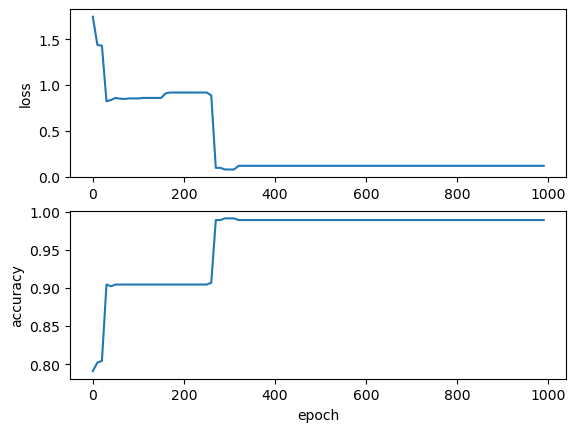

In [13]:
# 训练结果可视化
plt.subplot(2, 1, 1)
plt.plot(range(0, epoch, int(epoch/len(loss))), loss)
plt.ylabel('loss')
plt.subplot(2, 1, 2)
plt.plot(range(0, epoch, int(epoch/(len(accuracy)))), accuracy)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()